# Sentimental Analysis with tweeter using TFD vectorizer

<a name="back"></a>
# Table of contents
1. [Data analysis](#application)
    1. [Learning About Our Data Set With Exploratory Data Analysis](#subparagraph1)
2. [Creating features](#paragraph1)
3. [Experimental protocol (learning/validation/testing)](#paragraph2)
    1. [Spliting Training and Testing Data](#subparagraph31)
    1. [Measuring the Performance of a MultinomialNB Machine Learning Model](#subparagraph32)
4. [Testing new data](#paragraph3)
    1. [Testing on some negative tweets](#subparagraph41)
    1. [Testing on some positive tweets](#subparagraph42)
    1. [Testing on some mixt tweets](#subparagraph43)

# 1. Data analysis <a name="application"></a>

## A. Learning About Our Data Set With Exploratory Data Analysis <a name="subparagraph1"></a>

### Loading the Required Libraries and Modules

In [1]:
import pandas as pd
import numpy as np
import re 
import string
import matplotlib.pyplot as plt
import seaborn as sns 

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

### Data preparation

In [2]:
df = pd.read_csv("training.1600000.processed.noemoticon.csv", encoding = 'latin-1')

In [3]:
df.columns = ["target","ids","date","flag","user","tweet"]

### Removing Null Data From Our Data Set

In [4]:
#Data base dimention
df.shape

(1599999, 6)

In [5]:
#the number of null values for each variable
df.isna().sum()

target    0
ids       0
date      0
flag      0
user      0
tweet     0
dtype: int64

<AxesSubplot:>

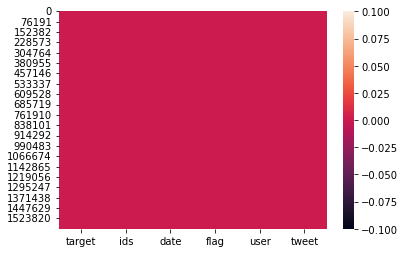

In [6]:
#visualization of null values
sns.heatmap(df.isna())

Thers's no null value to be removed

### Exration of a 10000 tweet

In [7]:
df1 = df.iloc[795000:805000,]

In [8]:
df1.shape

(10000, 6)

###  Descriptive stats

In [9]:
#display the first lines of the dataset
df1.head(5)

,target,ids,date,flag,user,tweet
795000,0,2327193206,Thu Jun 25 08:02:16 PDT 2009,NO_QUERY,djcampos,Blah 5am still up daang I got deep problems
795001,0,2327193455,Thu Jun 25 08:02:17 PDT 2009,NO_QUERY,RKF,@jenspeedy I would suggest avoiding 360 Living...
795002,0,2327193641,Thu Jun 25 08:02:18 PDT 2009,NO_QUERY,AnaHertz,@alexbroun I didn't convince myself I was fat ...
795003,0,2327193806,Thu Jun 25 08:02:18 PDT 2009,NO_QUERY,yenafer,"@spotzle @jstarrh check on sunscreen, snacks, ..."
795004,0,2327193864,Thu Jun 25 08:02:19 PDT 2009,NO_QUERY,eppoponotumus,im sitting alone at TTE myself without my two ...


In [10]:
# Type of variables
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 795000 to 804999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  10000 non-null  int64 
 1   ids     10000 non-null  int64 
 2   date    10000 non-null  object
 3   flag    10000 non-null  object
 4   user    10000 non-null  object
 5   tweet   10000 non-null  object
dtypes: int64(2), object(4)
memory usage: 468.9+ KB


In [11]:
df1.describe()

,target,ids
count,10000.0000,1.000000e+04
mean,2.0004,1.898126e+09
std,2.0001,4.300024e+08
min,0.0000,1.467822e+09
25%,0.0000,1.468239e+09
50%,4.0000,1.468600e+09
75%,4.0000,2.328189e+09
max,4.0000,2.329206e+09


### Examiner le targuet

In [12]:
# creatin target
y = df1["target"]

<AxesSubplot:xlabel='target', ylabel='count'>

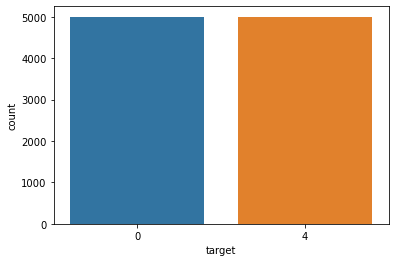

In [13]:
sns.countplot(x="target", data=df1)

### Cleaning textual data

In [14]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [15]:
stop_words = set(stopwords.words("english"))

In [16]:
def  clean_txt(txt):
    # Creating a sublist of lower case words for each tweet
    txt = txt.lower()
    # Removing URLs
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    txt = url_pattern.sub(r'', txt)
    # Removing mentions and tags
    txt = re.sub(r'\@\w+|\#',"", txt)
    # Rmoving puctuation and numbers
    punctuation = re.compile(r'[!"$%&\'()*+,-./:;<=>?\^_`{|}~|0-9]')
    txt = punctuation.sub("",txt)
    # Tokenizing
    txt_tokens = word_tokenize(txt)
    # Removing stop words from each tweet list of word
    txt = [ word  for word in txt_tokens if word not in stop_words]
    # Removing sequences with many "a"
    txt = [ re.sub(r'.*?(?=aaa)\w+[a-zA-Z]', "",t) for t in txt]
    txt = [ t for t in txt if not t == '']
    # removing this words
    words = ["u", "yr", "nop", "nope", "yes", "yup", "yeah"]
    txt = [ word  for word in txt if word not in words]
    # Steming
    pst = PorterStemmer()
    txt_stem = [pst.stem(word) for word in txt]
    # Lemmatizing
    wlm = WordNetLemmatizer()
    txt_lem = [wlm.lemmatize(word) for word in txt_stem]
    
    return " ".join(txt_lem)


In [17]:
tweet_list = [  clean_txt(tweet) for tweet in df1["tweet"]]

In [18]:
len(tweet_list)

10000

[Back to top](#back)

# 2. Creating features <a name="paragraph1"></a>

### Transforming text to numeric vectors by the count vectorizer

In [19]:
# Let's now create a tf-idf (Term frequnecy Inverse Document Frequency) model
tf_idf_vectorizer = TfidfVectorizer()

In [20]:
# Passing our sentences treating each as one document to TF-IDF vectorizer
X_tfd_vect = tf_idf_vectorizer.fit_transform(tweet_list)

In [21]:
### Dimension of the vector
X_tfd_vect.shape

(10000, 11265)

### Creating a pandas Dataframe of the vectorized text

In [22]:
X_tfd_names = tf_idf_vectorizer.get_feature_names()

In [23]:
X = pd.DataFrame(X_tfd_vect.toarray(),columns=X_tfd_names)

In [24]:
### Dimension of the Dataframe
X.shape

(10000, 11265)

### Viewing the first 5 entries

In [25]:
X.head()

,aampj,aargh,aaru,abay,abbi,abc,abcess,abdomen,aber,abi,...,½o,½r,½rmï,½se,½stand,½t,½tï,½ï,ã¼ã,ï¾
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


[Back to top](#back)

# 3. Experimental protocol (learning/validation/testing) <a name="paragraph2"></a>


## A. Spliting Training and Testing Data <a name="subparagraph31"></a>

### Spliting the data to training and testing set

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

### Training the MultinomialNB Model

In [27]:
# instantiate the model
clf = MultinomialNB()
# Fit the classifier to the data
# fit it to the training data
clf.fit(X_train,y_train)

MultinomialNB()

### Making Predictions With Our MultinomialNB Model

In [28]:
# Predict the labels for the training data X
# make predictions on the test data
y_pred = clf.predict(X_test)

[Back to top](#back)

## B. Measuring the Performance of a MultinomialNB Machine Learning Model <a name="subparagraph32"></a>

### Model Evaluation using Confusion Matrix

In [29]:
# confusion_matrix
print(f'Confusion Matrix:\n{metrics.confusion_matrix(y_test, y_pred)}\n')

# classification report
print(f'Classification Report: \n{metrics.classification_report(y_test, y_pred)}')

Confusion Matrix:
[[767 221]
 [270 742]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.74      0.78      0.76       988
           4       0.77      0.73      0.75      1012

    accuracy                           0.75      2000
   macro avg       0.76      0.75      0.75      2000
weighted avg       0.76      0.75      0.75      2000



### Visualizing Confusion Matrix using Heatmap

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

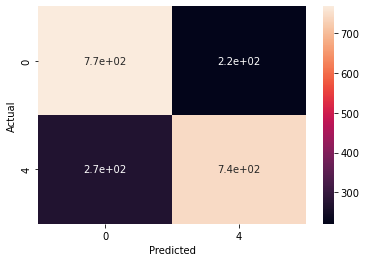

In [30]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

### Confusion Matrix Evaluation Metrics 

In [31]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred, pos_label = 4))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred, pos_label = 4))

Accuracy: 0.7545
Precision: 0.770508826583593
Recall: 0.733201581027668


### ROC Curve (Plotting an ROC curve)

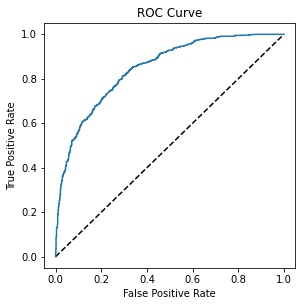

In [32]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = clf.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob, pos_label = 4)

# Plot ROC curve
plt.subplots(figsize=(4.5, 4.5))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

### AUC

In [33]:
# pass the True labels and the predicted probabilites to roc_auc_score
metrics.roc_auc_score(y_test, y_pred_prob)

0.8459603182858332

[Back to top](#back)

# 4. Testing new data <a name="paragraph3"></a>

## A. Testing on some negative tweets <a name="subparagraph41"></a>

### Exration of a 10000 tweet

In [34]:
df2 = df.iloc[:10000 ,]
df2.shape

(10000, 6)

In [35]:
df2.head()

,target,ids,date,flag,user,tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


<AxesSubplot:xlabel='target', ylabel='count'>

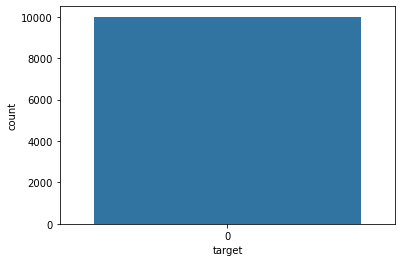

In [36]:
sns.countplot(x="target", data=df2)

In [37]:
def vectorize(txt):
    tweet_list = [  clean_txt(tweet) for tweet in txt]
    X_tfd_vect = tf_idf_vectorizer.transform(tweet_list)
    X_tfd_names = tf_idf_vectorizer.get_feature_names()
    X = pd.DataFrame(X_tfd_vect.toarray(),columns=X_tfd_names)
    return X

In [38]:
X_1 = vectorize(df2["tweet"])

In [39]:
y_pred_new1 = clf.predict(X_1)

In [40]:
df2['predicted_label'] = y_pred_new1.tolist()
df2.head()

C:\Users\dell\AppData\Local\Temp/ipykernel_19772/1176788316.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['predicted_label'] = y_pred_new1.tolist()


,target,ids,date,flag,user,tweet,predicted_label
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,0
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,0
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,0
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",4
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,4


In [41]:
y_test1 = df2["target"]

In [42]:
# confusion_matrix
print(f'Confusion Matrix:\n{metrics.confusion_matrix(y_test1,y_pred_new1)}\n')
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred_new1))

Confusion Matrix:
[[6721 3279]
 [   0    0]]

Accuracy: 0.6721


[Back to top](#back)

## B. Testing on some positive tweets <a name="subparagraph42"></a>

### Exration of a 10000 tweet

In [43]:
df3 = df.iloc[800000:810000,]
df3.shape

(10000, 6)

In [44]:
df3.head()

,target,ids,date,flag,user,tweet
800000,4,1467822273,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,becca210,im meeting up with one of my besties tonight! ...
800001,4,1467822283,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,Wingman29,"@DaRealSunisaKim Thanks for the Twitter add, S..."
800002,4,1467822287,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,katarinka,Being sick can be really cheap when it hurts t...
800003,4,1467822293,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,_EmilyYoung,@LovesBrooklyn2 he has that effect on everyone
800004,4,1467822391,Mon Apr 06 22:22:47 PDT 2009,NO_QUERY,ajarofalmonds,@ProductOfFear You can tell him that I just bu...


<AxesSubplot:xlabel='target', ylabel='count'>

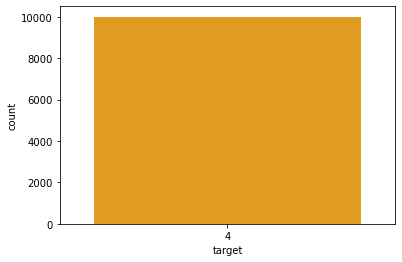

In [45]:
sns.countplot(x="target", data=df3, color='Orange')

In [46]:
X_2 = vectorize(df3["tweet"])

In [47]:
y_pred_new2 = clf.predict(X_2)

In [48]:
df3['predicted_label'] = y_pred_new2.tolist()
df3.head()

C:\Users\dell\AppData\Local\Temp/ipykernel_19772/4133918524.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['predicted_label'] = y_pred_new2.tolist()


,target,ids,date,flag,user,tweet,predicted_label
800000,4,1467822273,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,becca210,im meeting up with one of my besties tonight! ...,0
800001,4,1467822283,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,Wingman29,"@DaRealSunisaKim Thanks for the Twitter add, S...",4
800002,4,1467822287,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,katarinka,Being sick can be really cheap when it hurts t...,0
800003,4,1467822293,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,_EmilyYoung,@LovesBrooklyn2 he has that effect on everyone,4
800004,4,1467822391,Mon Apr 06 22:22:47 PDT 2009,NO_QUERY,ajarofalmonds,@ProductOfFear You can tell him that I just bu...,4


In [49]:
y_test2 = df3["target"]

In [50]:
# confusion_matrix
print(f'Confusion Matrix:\n{metrics.confusion_matrix(y_test2,y_pred_new2)}\n')
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred_new2))

Confusion Matrix:
[[   0    0]
 [2181 7819]]

Accuracy: 0.7819


[Back to top](#back)

## C. Testing on some mixt tweets <a name="subparagraph43"></a>

### Exration of a 10000 tweet

In [51]:
df4 = df.iloc[793500:803500,]
df4.shape

(10000, 6)

In [52]:
df4.head()

,target,ids,date,flag,user,tweet
793500,0,2326655316,Thu Jun 25 07:20:05 PDT 2009,NO_QUERY,JGPL,Xina misses her AEHQ. I missed my KXD
793501,0,2326655426,Thu Jun 25 07:20:05 PDT 2009,NO_QUERY,Jem_x,"@Victoria__x I wasn't calling you silly. Ok, ..."
793502,0,2326655529,Thu Jun 25 07:20:06 PDT 2009,NO_QUERY,TheIda,I'm running low on College Humor videos. HELP ...
793503,0,2326655705,Thu Jun 25 07:20:06 PDT 2009,NO_QUERY,kdhoney1,"Wet Backs and Soaking Sheets, Oh My! http://a2..."
793504,0,2326655738,Thu Jun 25 07:20:07 PDT 2009,NO_QUERY,sisnina,"ahhhh home, now off to do some life chores"


<AxesSubplot:xlabel='target', ylabel='count'>

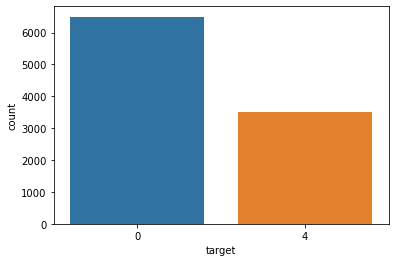

In [53]:
sns.countplot(x="target", data=df4)

In [54]:
X_3 = vectorize(df4["tweet"])

In [55]:
y_pred_new3 = clf.predict(X_3)

In [56]:
df4['predicted_label'] = y_pred_new3.tolist()
df4.head()

C:\Users\dell\AppData\Local\Temp/ipykernel_19772/2305100984.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['predicted_label'] = y_pred_new3.tolist()


,target,ids,date,flag,user,tweet,predicted_label
793500,0,2326655316,Thu Jun 25 07:20:05 PDT 2009,NO_QUERY,JGPL,Xina misses her AEHQ. I missed my KXD,0
793501,0,2326655426,Thu Jun 25 07:20:05 PDT 2009,NO_QUERY,Jem_x,"@Victoria__x I wasn't calling you silly. Ok, ...",4
793502,0,2326655529,Thu Jun 25 07:20:06 PDT 2009,NO_QUERY,TheIda,I'm running low on College Humor videos. HELP ...,0
793503,0,2326655705,Thu Jun 25 07:20:06 PDT 2009,NO_QUERY,kdhoney1,"Wet Backs and Soaking Sheets, Oh My! http://a2...",4
793504,0,2326655738,Thu Jun 25 07:20:07 PDT 2009,NO_QUERY,sisnina,"ahhhh home, now off to do some life chores",4


In [57]:
y_test3 = df4["target"]

In [58]:
# confusion_matrix
print(f'Confusion Matrix:\n{metrics.confusion_matrix(y_test3,y_pred_new3)}\n')
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test3, y_pred_new3))

Confusion Matrix:
[[5511  988]
 [ 503 2998]]

Accuracy: 0.8509


[Back to top](#back)